# Gradient Boosting regression

In [1]:
%matplotlib inline

In [2]:
import math
import pickle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence

<font color="Green">
## Passed Arguments

In [3]:
# Data parameters
X_train = pickle.load(open('X_train.pkl', 'rb'))  # allow pickle or csv

# Plotting parameters
n_features_to_display = 13
max_per_plot = 10

# limit to 10 features per plot and 3 plots per row
n_ax_cols = min(3, math.ceil(n_features_to_display / max_per_plot))
n_ax_rows = math.ceil(n_features_to_display / max_per_plot / n_ax_cols)

In [4]:
clf = pickle.load(open('boston_fitted_gbregr.pkl', 'rb'))

feature_indices = [0, 3, 8, 9, 11]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                          'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
params = clf.get_params()

In [5]:
# some check on passed in parameters

feature_importance = clf.feature_importances_
if len(feature_names) != feature_importance.shape[0]:
    raise ValueError("The passed feature_names is not valid. The order \
                      of the feature_names should match indices of the \
                      data the model was trained on.")
n_features = feature_importance.shape[0]

<font color="Red">

## Single Partial Dependence

In [6]:
def adjust_plot_fontsize(ax, fontsize):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(fontsize)

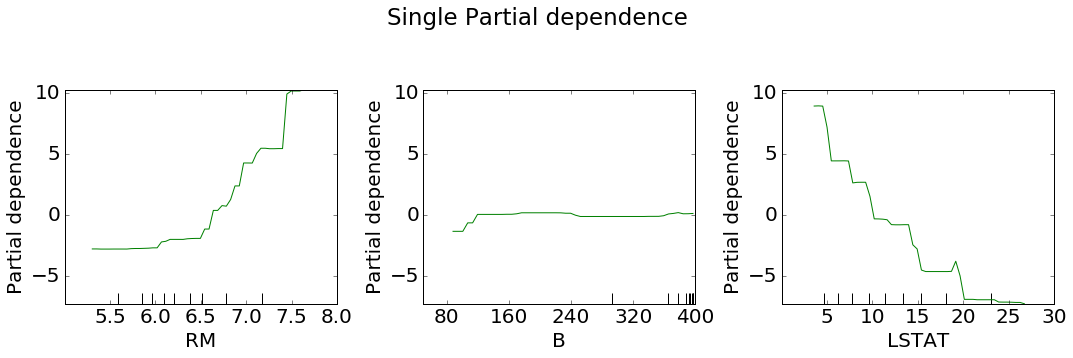

In [7]:
font_settings = {'family': 'normal', 'size': 22}

features = [5, 11, 12]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=feature_names,
                                   n_jobs=3, grid_resolution=50,
                                   figsize=(15, 5))

for ax in axs: adjust_plot_fontsize(ax, fontsize=20)

# plt.font = font_settings
plot_title = 'Single Partial dependence'
fig.suptitle(plot_title, size=23)
plt.tight_layout()
plt.subplots_adjust(top=0.75)  # tight_layout causes overlap with suptitle
plt.show()

<font color="Red">
## Relational Partial Dependence

### Contour plots

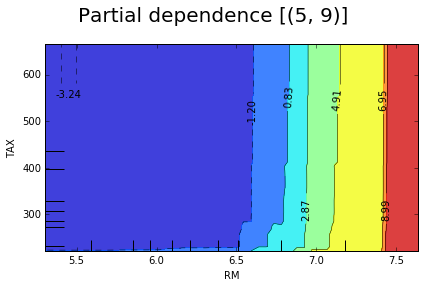

In [9]:
features = [(5, 9)]
fig, axs = plot_partial_dependence(clf, X_train, features, feature_names=feature_names,
                                   n_jobs=3, grid_resolution=50)

fig.suptitle('Partial dependence {}'.format(features), fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### 3-D Rendered Plots

<IPython.core.display.Javascript object>


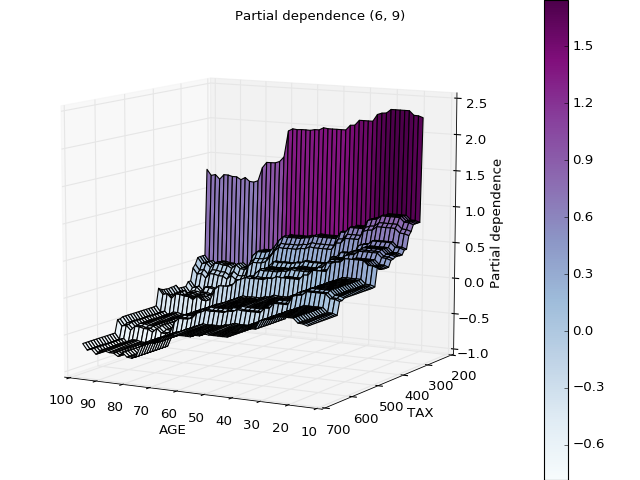

In [10]:
# %matplotlib notebook
fig = plt.figure()
target_feature = (6, 9)
pdp, axes = partial_dependence(clf, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu)

# Visual customizations
ax.set_xlabel(feature_names[target_feature[0]])
ax.set_ylabel(feature_names[target_feature[1]])
ax.set_zlabel('Partial dependence')
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence {}'.format(target_feature))
plt.subplots_adjust(top=0.85)

plt.show()